# Wine Tasting Data (UCI, 2015)
This dataset was downloaded from the UCI Machine Learning Repository.

**INTRODUCTION**  
Three wine-tasting experts tasted ~ 6500 samples of Portuguese "Vinho Verde" wine, where ~30% and ~ 70% of the data are the red and white variants respectively. Each taster rated the QUALITY of each sample on scale of 1 - 10 (1 = bad, 10 = extraordinary) and the final quality rating assigned each sample is the median of the judges rating. Each sample also has data detailing some of its chemical and physical properties like pH (measure of acidity), the amount of certain chemical compounds, the density and the total amount of alcohol. 

Some immediate questions concerning this dataset:

    - Can we CLASSIFY samples as red or white wine with high accuracy given the sample data?
    - Can we CLASSIFY samples as high or low quality with high accuracy given the sample data?
    - Can we PREDICT the numeric quality of a sample with high accuracy (ie. replace tasters with computers)?
    - How consistent and/or accurate are wine-tasting experts at identifying an objectively "good" sample?
    
Before we start, it is certainly worth asking the question: is there an objective set of chemical and physical properties that makes a wine good or bad? There are different _types_ of wines of the same colour, each of which are differentiated by things like the type of grapes used, added fruits or flavourings, aging times and temperatures, manner of storage and varying nutrient densities in the soils of the vineyard. Rephrasing the question, _for a given type of wine_, is there an objective set of properties that makes it good or bad? Without too much knowledge of how wine-tasters taste, I'd assume that tasters are indeed looking for particular qualities that they will identify with their tastebuds and no knowledge of the actual chemical structure of the wine. For example, a chef knows what a filet mignon _should_ taste like given the way it has historically been cooked, and thus knows what to look for in the taste of a "good" filet mignon.  

Interestingly, there exist many studies that show wine-tasting experts often "incorrectly" rate the quality of wine in international competitions. By incorrectly, we mean rating wines that have won awards for quality in other competitions as poor, or vice-versa (Hodgson 2012, Journal of Wine Economics). These competitions are often blind taste tests with no information about the tasted wine (no bottle shape, no label or mention of accrued awards, no suggested flavours or time of aging) and thus a rating depends exclusively on _taste_. This does not necessarily imply that there are no objective qualities of good or bad wines, but that the sensory experience of taste itself is heavily influenced by other factors like the label design and colour, knowledge of awards, bottle shape, wine texture, etc. Those involved in the food industry are well aware that presentation is key - nobody wants to eat something visually unappetizing even if it tastes the same as a regular steak.

Tasting experts can even be fooled into believing a _white wine_ is a red one if it is died red and _presented_ as a red wine (Morrot 2001, Brain and Language). This implies that, despite any findings we may produce that clearly differentiate red from white wine on a chemical or physical basis, an expert wine-taster may not be able to properly _interpret_ these differences by the tongue. Fascinating!
    
**VARIABLE DESCRIPTION:**
    - QUALITY (integer in [1 - 10])
    - FIXED ACIDITY (numeric, g/dm$^3$)
    - VOLATILE ACIDITY (numeric, g/dm$^3$)
    - CITRIC ACID (numeric, g/dm$^3$)
    - RESIDUAL SUGAR (numeric, g/dm$^3$)
    - CHLORIDES (numeric, g/dm$^3$)
    - FREE SULFUR DIOXIDE (numeric, mg/dm$^3$)
    - TOTAL SULFUR DIOXIDE (numeric, mg/dm$^3$)
    - DENSITY (numeric, g/dm$^3$)
    - pH (numeric, <= 14)
    - SULPHATES (numeric, g/dm$^3$)
    - ALCOHOL (numeric, [0.0 - 1.0], % volume)
    
Units for most quantities are in MASS DENSITY, with grams (g) or milligrams (mg) per cubic decimeter (dm).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_context('notebook')
sns.set_style('whitegrid')
%matplotlib inline

def PlottingDefault():
    sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="white")
PlottingDefault()

## Exploratory Data Analysis (EDA)

In [2]:
# Read in data and describe it.
df = pd.read_csv('/Users/reubengazer/Downloads/winequalityN.csv')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Deal with observations missing values. We can interpolate/impute values or remove observations altogether.


In [3]:
n = df[df.isnull().values == True].shape[0]
print "There are {} rows ({}% of data) with at least one missing cell.".format(n,round(n/float(df.shape[0]),2))
# With such a small percentage, we can simply remove all "error" rows without worry.
print "Removing rows with missing values..."
df.drop(df[df.isnull().values == True].index,inplace=True)

There are 38 rows (0.01% of data) with at least one missing cell.
Removing rows with missing values...


There are almost exactly 3 times as many white wines as red in the data. 

### Plot 1a: Pairplot of All Variables

Red wine is displayed as RED and white as GREEN (white markers would be difficult!)

In [ ]:
sns.pairplot(df,hue='type',hue_order=['red','white'],palette=['red','green'])

There appear to be obvious visual differences in physical and chemical properties between the red and white wine populations. As expected, these wines are inherently different enough to build an accurate classifier to predict the wine type. Let's also make a heatmap to see correlation numbers to begin feature selection.

### Plot 1b: Heatmap of All Variables

In [ ]:
plt.figure(figsize=[10,10])
ax = sns.heatmap(df.corr(),cmap='coolwarm',linewidth=2,annot=True)

### Caption 1

From the above two correlation plots, some noteworthy correlations are:

    - Density vs. Alcohol, Residual Sugar or Fixed Acidity (negative) 
        - alcohol is less dense than water, therefore higher alcohol = lower density, holding all else constant
        - residual sugar is denser than water. Higher sugar = higher density, holding all else constant
    - pH vs. any type of acid 
        -the pH is a directly dependent on the relative amounts of each acid, which each have their own pH
    - Free and Total Sulfur Dioxide
        - One comprises the other
    - Quality vs. Alcohol (positive)
    - Quality vs. Density (negative) 
        - but recall ALCOHOL and DENSITY are themselves correlated physically (negatively)
    - Quality vs. Volatile Acidity (negative)

### Comparing Red and White Wine Samples
Let's leave all predictors in for the moment and build a logistic regresser that predicts the wine type with __sklearn__ to classify wine type.  
First, build red and white copy data sets for syntax ease.

In [4]:
# Make copies for red and white datasets.
red,white = df[df['type']=='red'],df[df['type']=='white']

# How many of each type of wine are, red and white?
for wine in ['red','white']:
    print "Number of {} wines in data = {}".format(wine,len(df[df['type']==wine]))

Number of red wines in data = 1593
Number of white wines in data = 4870


**Boxplots of All Predictors Comparing Red, White Wine**  
How different are the predictor distributions for each wine type?

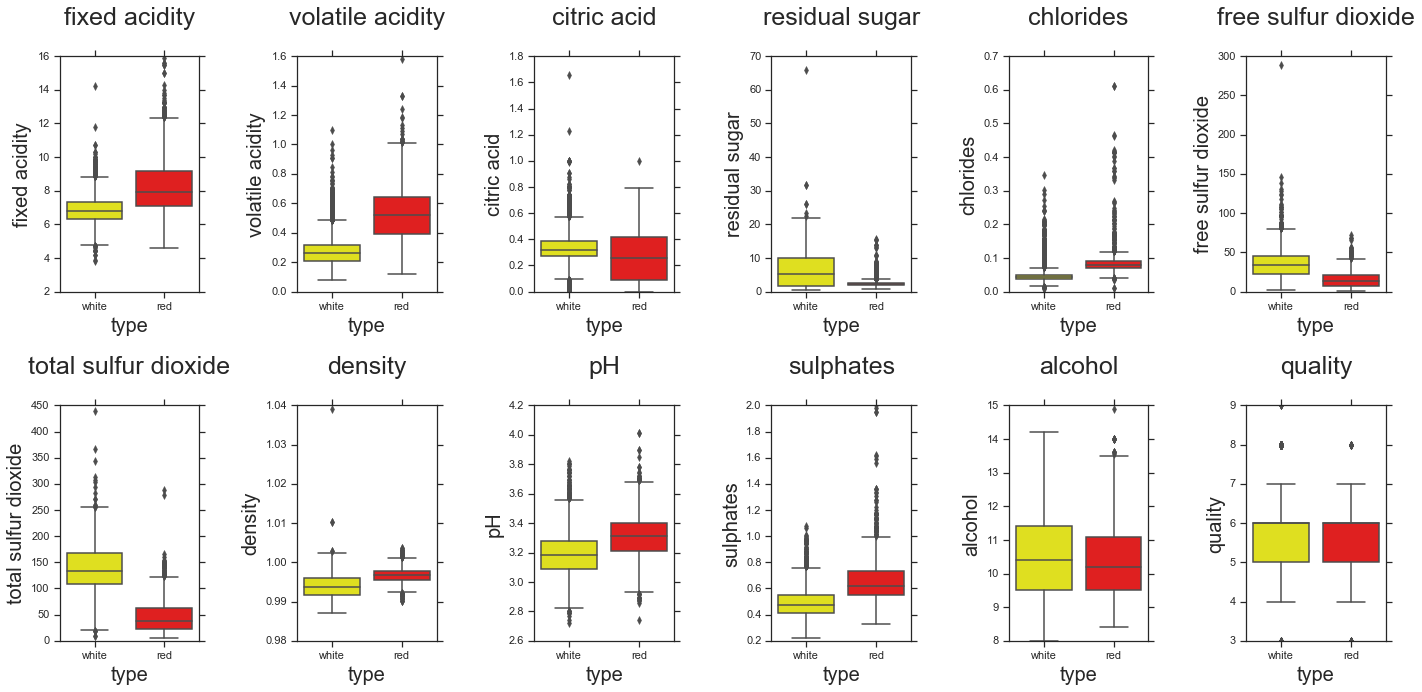

In [5]:
fig, axes = plt.subplots(nrows=2,ncols=6,figsize=[20,10])
columngrid = np.array(df.columns[df.columns!='type']).reshape(2,6)

for i,column in enumerate(df.columns[df.columns!='type']):
    ind1,ind2 = np.where(columngrid==column)
    ind1,ind2=ind1[0],ind2[0]
    sns.boxplot(x='type',y=column,data=df,ax=axes[ind1,ind2],palette=['yellow','red'])
    axes[ind1,ind2].set_title(column+'\n',fontsize=25)
plt.tight_layout()

Visually, red and white wines differ substantially in all chemicals, and in general are only similar in the quality ratings and the alcohol content. Crucially, _the quality of the wine is independent of the type of wine_.

** Student's T-test for Significant Differences of Mean Predictor Values in Red, White Wine**

Group by colour/type and show the mean of each aggregate variable.

In [6]:
df.groupby('type').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
red,8.326365,0.527659,0.271551,2.538512,0.087497,15.841808,46.463905,0.996752,3.310590,0.657866,10.419617,5.636535
white,6.855123,0.278071,0.334199,6.394343,0.045771,35.317146,138.340144,0.994026,3.188154,0.489700,10.516772,5.878029


In [7]:
# Initialize dataframe for t, p statistics outputs with index as each attribute save type.
tdf=pd.DataFrame(index=[colname for colname in df.columns[df.columns!='type']])
t,p,sig=[],[],[]
for colname in df.columns[df.columns!='type']: # type is a string and we've grouped by it.
    alpha = 0.05 # significance tolerance.
    t2, p2 = stats.ttest_ind(red[colname],white[colname],equal_var=False) # Welch's 2-sided t-test.
    t.append(t2)
    p.append(p2)
    if p2<alpha:
        sig.append(True)
    else:
        sig.append(False)
# Assign columns.
tdf['t'] = t
tdf['p'] = p
tdf['Significant?'] = sig
tdf

,t,p,Significant?
fixed acidity,32.509130,1.269235e-183,True
volatile acidity,52.905980,0.000000e+00,True
citric acid,-12.093996,1.493459e-32,True
residual sugar,-47.709634,0.000000e+00,True
chlorides,34.153280,5.432382e-198,True
free sulfur dioxide,-54.477398,0.000000e+00,True
total sulfur dioxide,-89.629064,0.000000e+00,True
density,42.689398,0.000000e+00,True
pH,27.639596,4.942179e-148,True
sulphates,36.909064,6.719283e-230,True


Although all differences in means between red and white are statistically significant, this does not mean that the differences are IMPORTANT to us. For example, the fractional differences between the means in QUALITY is incredibly small (2%), so this doesn't really reflect a large enough difference for us to care.

However, mean values of predictors like total sulfur dioxide (as an example) are not only statistically different by the t-test but almost importantly different - the fractional difference is quite large (~50%).

### Machine Learning Model I: Classification of Red or White WIne

How accurately can we classify the type of wine given its predictors, and which predictors should we use in the classification model? This depends on the level of correlation between predictors as well as the selection of the model (ie. Naive Bayes assumes predictor independence).

Let's start with all predictors included in the model to get an initial look at classification accuracy. 

In [15]:
# Split 50% test, 50% train.
from sklearn.cross_validation import train_test_split, KFold, cross_val_predict, cross_val_score
X,y = df.drop('type',axis=1),df['type']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Train logistic model.
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

# Print the coefficients of the model.
print("\nLogistic Regression Coefficients:\n")
print(pd.DataFrame.from_records(zip(df.columns[df.columns!='type'],logmodel.coef_[0]),columns=['Predictor','Coef']))

# K-Fold Cross Validation Scheme for our Logisitic Model.
cv = KFold(len(df),n_folds=5,shuffle=True)
log_accuracy = cross_val_score(logmodel, X, y, cv=cv).mean()
print "\nModel Accuracy With 5-Fold CV = {:.2f}%".format(100*log_accuracy)

# Make predictions with our logistic model.
predictions = cross_val_predict(logmodel,X=X,y=y)

# How well did we do? Produce a classification report and a confusion matrix.
from sklearn.metrics import confusion_matrix,classification_report
print("\nClassification Report:\n")
print(classification_report(y,predictions))
print("Confusion Matrix:\n")
print(confusion_matrix(y,predictions))


Logistic Regression Coefficients:

               Predictor      Coef
0          fixed acidity -0.685354
1       volatile acidity -8.160461
2            citric acid  0.645993
3         residual sugar  0.145592
4              chlorides -2.668380
5    free sulfur dioxide -0.050297
6   total sulfur dioxide  0.061850
7                density  3.295319
8                     pH -2.365829
9              sulphates -6.340185
10               alcohol  0.777193
11               quality  0.085173

Model Accuracy With 5-Fold CV = 98.22%

Classification Report:

             precision    recall  f1-score   support

        red       0.97      0.95      0.96      1593
      white       0.98      0.99      0.99      4870

avg / total       0.98      0.98      0.98      6463

Confusion Matrix:

[[1510   83]
 [  45 4825]]


In this training set, there are N = 3232 observations (half of the total dataset).  
747+26 = 773 total white, 40+2419 = 2459 total red.    
The classifier performed fantastically in determining wine type from predictors:

    - 747 / 773 or 96% of reds were correctly identified as red (~4% error rate)
    - 2419 / 2459 or 98% of whites were correctly identified as white (~2% error rate)
    - Overall a total classification error rate of 2%

### What makes a wine HIGH or LOW quality?
Let's classify the data by separating out wines with quality ratings of [8-10] as 'good' and [0-3] as 'bad'. Anything else is considered 'mid'.

In [17]:
df['Quality Class'] = 'mid'
df.loc[df['quality']>=8,'Quality Class'] = 'good'
df.loc[df['quality']<=3,'Quality Class'] = 'bad'

good, bad = df[df['quality']>=8],df[df['quality']<=3]

print("There are {:3.1f}% red and {:3.1f}% white wines in the entire dataset.\n".format(100*float(len(red))/len(df),100*float(len(white))/len(df)))
print("Of the {} GOOD wines, {:4.1f}% are RED and {:4.1f}% are WHITE.".format(len(good),100*float(len(good[good['type']=='red']))/len(good),100*float(len(good[good['type']!='red']))/len(good)))
print("Of the {} BAD wines, {:4.1f}% are RED and {:4.1f}% are WHITE.".format(len(bad),100*float(len(bad[bad['type']=='red']))/len(bad),100*float(len(bad[bad['type']!='red']))/len(bad)))

There are 24.6% red and 75.4% white wines in the entire dataset.

Of the 197 GOOD wines,  9.1% are RED and 90.9% are WHITE.
Of the 30 BAD wines, 33.3% are RED and 66.7% are WHITE.


There exists a larger fraction of GOOD wines that are WHITE than the actual white fraction, and a larger fraction of BAD wines that are RED than the actual red fraction. This is a bias towards RED for BAD WINE and a bias towards WHITE for GOOD WINE - but for what reason? If the judges are rating quality with the colour of the wine in mind (ie. rating red wine for how much it tastes like a "good" red wine) this means that there is a production bias that produces better whites than reds. If tasters are rating wines independent of the type itself, this means that red wines contain combinations of chemicals that taste poor more frequently than white, and that white contains a combination of chemicals that taste good more frequently than red.

**Plot: Quality Class vs. All Predictors**  
How different are the predictor distributions for each wine type? Each of these plots will show any trends that exist between bad and good wines in general, independent of the wine colour.

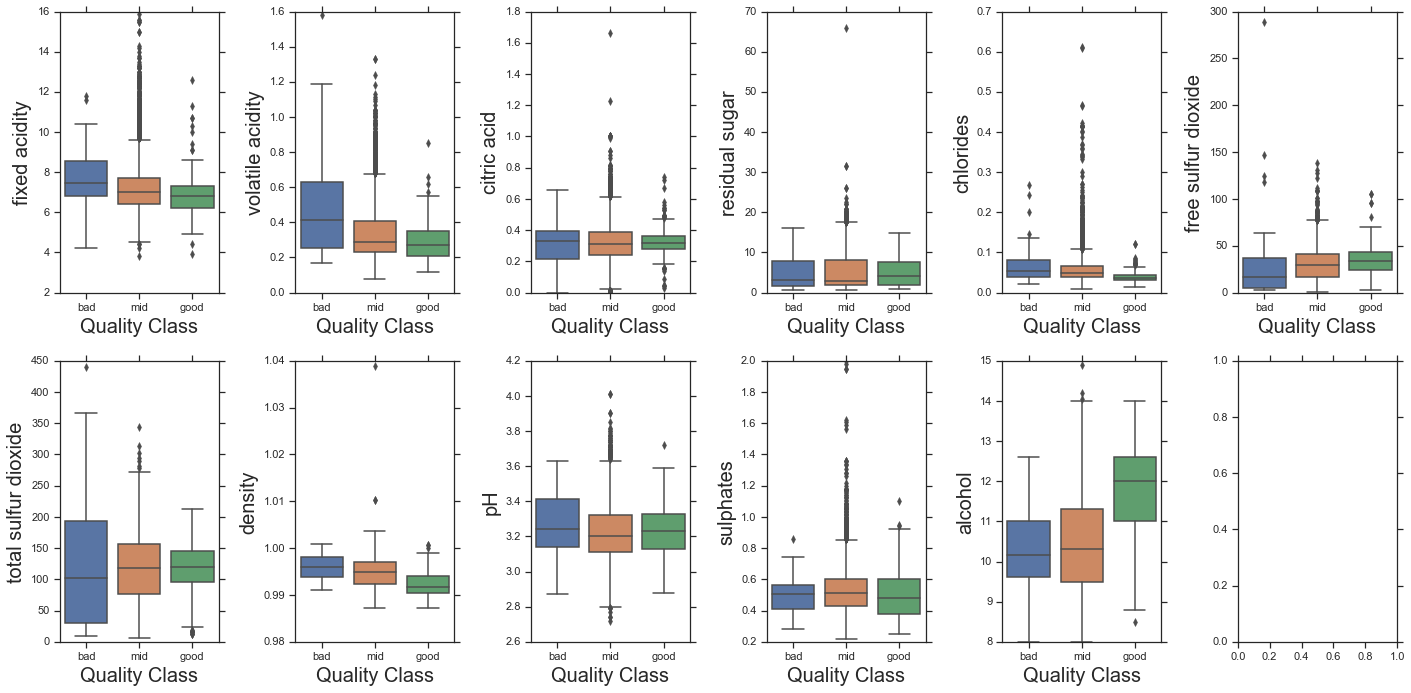

In [23]:
fig, axes = plt.subplots(nrows=2,ncols=6,figsize=[20,10])
columngrid = np.array(df.columns.drop(['type','Quality Class'])).reshape(2,6)

for i,column in enumerate(df.columns.drop(['type','Quality Class','quality'])):
    ind1,ind2 = np.where(columngrid==column)
    ind1,ind2=ind1[0],ind2[0]
    sns.boxplot(x='Quality Class',y=column,data=df,ax=axes[ind1,ind2],order=['bad','mid','good'])
plt.tight_layout()

**Plot: Quality Class vs. All Predictors, Stratified by Colour/Type**  
Repeat the same as above, except stratify by the colour.

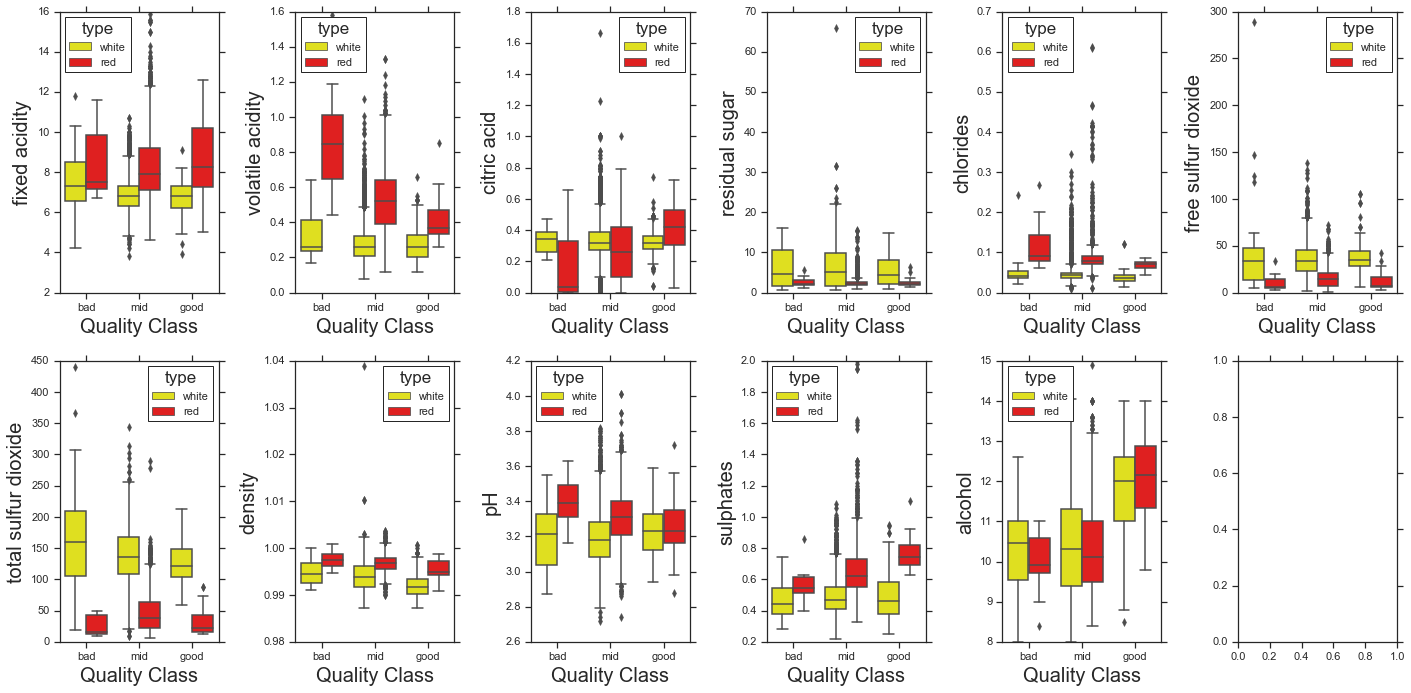

In [25]:
fig, axes = plt.subplots(nrows=2,ncols=6,figsize=[20,10])
columngrid = np.array(df.columns.drop(['type','Quality Class'])).reshape(2,6)

for i,column in enumerate(df.columns.drop(['type','Quality Class','quality'])):
    ind1,ind2 = np.where(columngrid==column)
    ind1,ind2=ind1[0],ind2[0]
    sns.boxplot(x='Quality Class',y=column,data=df,ax=axes[ind1,ind2],order=['bad','mid','good'],hue='type',palette=['yellow','red'])
plt.tight_layout()

Keeping in mind that each trend is interpreted _with all other variables held constant_, the takeaways from each of the above plots, in order:
    - FIXED ACIDITY is not a strong predictor of quality
    - Red wine quality is higher with less VOLATILE ACIDITY, CHLORIDES, more CITRIC ACID, SULPHATES
    - White wine is not significantly affected by VOLATILE ACIDITY, CITRIC ACID, CHLORIDES, SULPHATES
    - RESIDUAL SUGAR has no impact on quality rating across both colours
    - Red wine is better when more acidic (lower pH), white wine quality is independent of pH
    - The BEST RED AND/OR WHITE WINES HAVE THE HIGHEST ALCOHOL CONTENT (~2% higher than wines rated below 8)